# <a id='toc8_'></a>[Data exploratory analysis](#toc0_)

The last part of the project will consist in making a data exploratory analysis of the target cities obtained from all the datasets obtained.

In [16]:
import pandas as pd
import pickle as pkl
import numpy as np
import folium

from pathlib import Path
from folium import plugins

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [17]:
DATA_DIR = Path("..") / "data"
FIG_DIR = Path("..") / "figures"

with open(DATA_DIR / "final_cities.pkl", "rb") as f:
    final_cities = pkl.load(f)

eurostat_data = pd.read_csv(DATA_DIR / "eurostat_data.csv")
weather_data = pd.read_csv(DATA_DIR / "weather_data.csv")
places_data = pd.read_csv(DATA_DIR / "places_data.csv")
airbnb_data = pd.read_csv(DATA_DIR / "airbnb_processed.csv", delimiter=";")

## <a id='toc8_1_'></a>[Ponderation value of `eurostat_data`](#toc0_)

This plot shows the `Ponderation` value of the `eurostat_data` dataset where the best ponderation values are represented with a heat colormap.

In [18]:
# Visualization of the ponderations
ponderation_plot = px.bar(
    data_frame=eurostat_data,
    x="Country",
    y="Ponderation",
    color="Standarized Satisfaction",
)

ponderation_plot.write_html(FIG_DIR / "ponderation_plot.html")
ponderation_plot.write_image(FIG_DIR / "ponderation_plot.png")

ponderation_plot.show()

## <a id='toc8_2_'></a>[Weather visualization](#toc0_)

This plot shows the actual temperature in the target cities. The colormap shows the humidity level in each city.

In [19]:
# Visualization of current weather data
temperature_by_city = px.bar(
    data_frame=weather_data,
    x="City",
    y="Temperature (ºC)",
    hover_data=[
        "Main",
        "Minimun temperature (ºC)",
        "Maximun temperature (ºC)",
        "Pressure (hPa)",
        "Humidity (%)",
        "Wind speed (meter/sec)",
    ],
    color="Humidity (%)",
    color_continuous_scale=[(0, "lightblue"), (1, "blue")],
)

temperature_by_city.write_html(FIG_DIR / "temperature_by_city.html")
temperature_by_city.write_image(FIG_DIR / "temperature_by_city.png")

temperature_by_city.show()

## <a id='toc8_3_'></a>[Interest places visualization](#toc0_)

The next three maps show the location of the interesting places in the top 3 cities.

In [20]:
# Visualization of Valencia map with the interesting places
sf_map_bern = folium.Map(
    location=[final_cities["Bern"]["lat"], final_cities["Bern"]["lon"]],
    zoom_start=14,
    tiles="OpenStreetMap",
)

interest_places_bern = plugins.MarkerCluster()

for lat, lon, name in zip(
    places_data[places_data["Country"] == "CH"]["Latitude"],
    places_data[places_data["Country"] == "CH"]["Longitude"],
    places_data["Name"],
):

    interest_places_bern.add_child(folium.Marker(location=[lat, lon], popup=name))

sf_map_bern.add_child(interest_places_bern)

sf_map_bern.save(FIG_DIR / "sf_map_bern.html")

sf_map_bern

In [21]:
# Visualization of London map with the interesting places
sf_map_berlin = folium.Map(
    location=[final_cities["Berlin"]["lat"], final_cities["Berlin"]["lon"]],
    zoom_start=12,
)

interest_places_berlin = plugins.MarkerCluster()

for lat, lon, name in zip(
    places_data[places_data["Country"] == "DE"]["Latitude"],
    places_data[places_data["Country"] == "DE"]["Longitude"],
    places_data["Name"],
):

    interest_places_berlin.add_child(folium.Marker(location=[lat, lon], popup=name))

sf_map_berlin.add_child(interest_places_berlin)

sf_map_berlin.save(FIG_DIR / "sf_map_berlin.html")

sf_map_berlin

In [22]:
# Visualization of Amsterdam map with the interesting places
sf_map_paris = folium.Map(
    location=[final_cities["Paris"]["lat"], final_cities["Paris"]["lon"]],
    zoom_start=14,
)

interest_places_paris = plugins.MarkerCluster()

for lat, lon, name in zip(
    places_data[places_data["Country"] == "FR"]["Latitude"],
    places_data[places_data["Country"] == "FR"]["Longitude"],
    places_data["Name"],
):

    interest_places_paris.add_child(folium.Marker(location=[lat, lon], popup=name))

sf_map_paris.add_child(interest_places_paris)

sf_map_paris.save(FIG_DIR / "sf_map_paris.html")

sf_map_paris

## <a id='toc8_4_'></a>[Airbnb exploratory analysis](#toc0_)

The following plots show how the variables `price_per_night`, `rating` and `reviews` are distributed.

### <a id='toc8_4_1_'></a>[Price and rating distribution by accomodation type](#toc0_)

In [23]:
price_rating_distribution = px.scatter(
    data_frame=airbnb_data,
    x="rating",
    y="price_per_night",
    color="category",
    opacity=0.7,
    title="Price and rating distribution by accomodation type",
    labels={"rating": "Rating", "price_per_night": "Price per night"},
)

price_rating_distribution.write_html(FIG_DIR / "price_rating_distribution.html")
price_rating_distribution.write_image(FIG_DIR / "price_rating_distribution.png")

price_rating_distribution.show()

### <a id='toc8_4_2_'></a>[Price and rating distribution by accomodation type (logaritmic scale)](#toc0_)

In [24]:
price_rating_distr_log = px.scatter(
    data_frame=airbnb_data,
    x="rating",
    y="price_per_night",
    log_x=True,
    color="category",
    title="Price and rating distribution by accomodation type (logarithmic scale)",
    labels={"rating": "Rating (log scale)", "price_per_night": "Price per night"},
)
price_rating_distr_log.write_html(FIG_DIR / "price_rating_distr_log.html")
price_rating_distr_log.write_image(FIG_DIR / "price_rating_distr_log.png")

price_rating_distr_log.show()

### <a id='toc8_4_3_'></a>[Reviews and rating distribution by accomodation type (logaritmic scale)](#toc0_)

In [25]:
# Plot the scatter plot with fixed 'price_per_night' column
reviews_rating_distribution = px.scatter(
    data_frame=airbnb_data,
    x="rating",
    y="reviews",
    log_x=True,
    color="category",
    title="Reviews and rating distribution by accomodation type (logarithmic scale)",
    labels={"rating": "Rating", "reviews": "Reviews"},
    hover_name="name",
    opacity=0.5,
    size="price_per_night",
    size_max=15,
)

reviews_rating_distribution.write_html(FIG_DIR / "reviews_rating_distribution.html")
reviews_rating_distribution.write_image(FIG_DIR / "reviews_rating_distribution.png")

reviews_rating_distribution.show()

### <a id='toc8_4_4_'></a>[Pricing distribution by city](#toc0_)

In [26]:
pricing_distribution = px.histogram(
    airbnb_data,
    x="price_per_night",
    color="city",
    title="Pricing distribution by city",
    labels={"price_per_night": "Price per night", "city": "City"},
    nbins=100,
)

pricing_distribution.write_html(FIG_DIR / "pricing_distribution.html")
pricing_distribution.write_image(FIG_DIR / "pricing_distribution.png")

pricing_distribution.show()

### <a id='toc8_4_5_'></a>[Pricing distribution by city (logaritmic scale)](#toc0_)

In [27]:
pricing_distribution_log = px.histogram(
    airbnb_data,
    x="price_per_night",
    log_x=True,
    color="city",
    title="Pricing distribution by city (logarithmic scale)",
    labels={"price_per_night": "Price per night", "city": "City"},
    nbins=100,
)

pricing_distribution_log.write_html(FIG_DIR / "pricing_distribution_log.html")
pricing_distribution_log.write_image(FIG_DIR / "pricing_distribution_log.png")

pricing_distribution_log.show()

### <a id='toc8_4_6_'></a>[Price boxplot by city and accomodation type](#toc0_)

In [28]:
price_boxplot = px.box(
    data_frame=airbnb_data,
    x="city",
    y="price_per_night",
    color="category",
    points="suspectedoutliers",
    hover_name="name",
    title="Price boxplot by city and accomodation type",
    labels={
        "price_per_night": "Price per night",
        "city": "City",
        "category": "Accomodation type",
    },
)

price_boxplot.write_html(FIG_DIR / "price_boxplot.html")
price_boxplot.write_image(FIG_DIR / "price_boxplot.png")

price_boxplot.show()

### <a id='toc8_4_7_'></a>[Reviews and price distribution by city](#toc0_)

In [29]:
reviews_price_distribution = px.scatter(
    data_frame=airbnb_data,
    x="price_per_night",
    y="reviews",
    hover_data=["city", "rating", "category"],
    hover_name="name",
    color="city",
    opacity=0.5,
    title="Reviews and price distribution by city",
    labels={"price_per_night": "Price per night", "reviews": "Reviews", "city": "City"},
)

reviews_price_distribution.write_html(FIG_DIR / "reviews_price_distribution.html")
reviews_price_distribution.write_image(FIG_DIR / "reviews_price_distribution.png")

reviews_price_distribution.show()

### <a id='toc8_4_8_'></a>[Reviews and price distribution by city (logaritmic scale)](#toc0_)

In [30]:
reviews_price_distr_log = px.scatter(
    data_frame=airbnb_data,
    x="price_per_night",
    y="reviews",
    hover_data=["city", "rating", "category"],
    hover_name="name",
    color="city",
    opacity=0.5,
    log_x=True,
    log_y=True,
    size="rating",
    size_max=5,
    title="Reviews and price distribution by city (logarithmic scale)",
    labels={
        "price_per_night": "Price per night (log scale)",
        "reviews": "Reviews (log scale)",
        "city": "City",
    },
)
reviews_price_distr_log.write_html(FIG_DIR / "reviews_price_distr_log.html")
reviews_price_distr_log.write_image(FIG_DIR / "reviews_price_distr_log.png")

reviews_price_distr_log.show()

### <a id='toc8_4_9_'></a>[Count of accomodations by type and city](#toc0_)

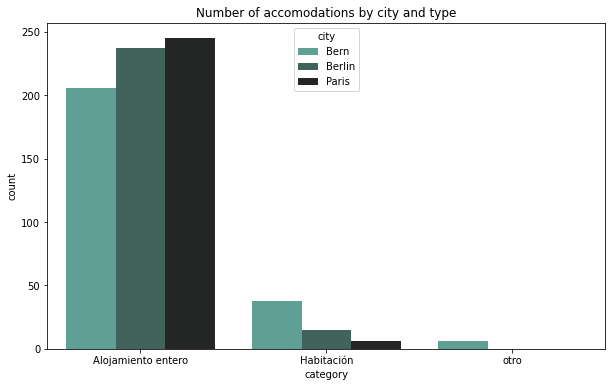

In [32]:
fig = plt.figure(figsize=(10, 6))

accom_count_per_city = sns.countplot(
    x="category", hue="city", data=airbnb_data, palette="dark:#5A9_r"
)

plt.title("Number of accomodations by city and type")

plt.savefig(FIG_DIR / "accom_count_per_city.png")

plt.show()

### <a id='toc8_4_10_'></a>[Median of price grouped by country](#toc0_)

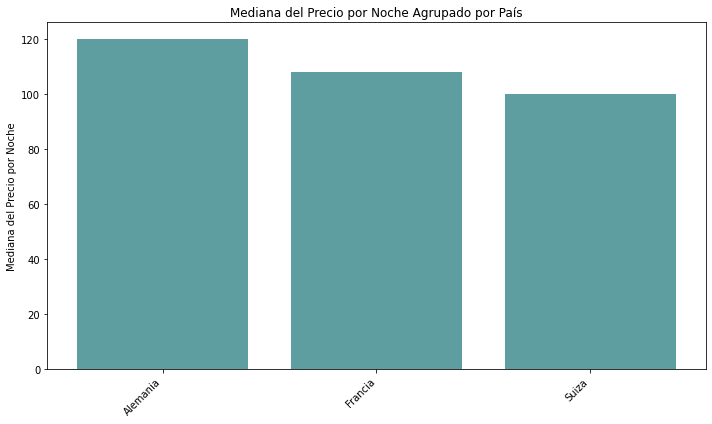

In [ ]:
median_prices = airbnb_data.groupby("country")["price_per_night"].median().reset_index()

# Gráfico de barras
fig = plt.figure(figsize=(10, 6))
plt.bar(median_prices["country"], median_prices["price_per_night"], color="cadetblue")

# Etiquetas
plt.ylabel("Mediana del Precio por Noche")
plt.title("Mediana del Precio por Noche Agrupado por País")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()

plt.savefig(FIG_DIR / "median_prices.png")
plt.show()